In [1]:
import astropy.units as u
import numpy as np
import popsims #for plot aesthetics
import matplotlib.pyplot as plt
#%matplotlib notebook
from tqdm import tqdm

#import HSS
import seaborn as sns
import matplotlib as mpl

import astropy.coordinates as astro_coord
import glob
import pandas as pd
#/sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {'axes.titlesize'      : 'large',   # fontsize of the axes title
        'axes.labelsize'      : 'large', # fontsize of the x any y labels
        'size'   : 20}


import itertools
from scipy import stats
from shapey import Box
#paths
path_plot = '/users/caganze/research/stellarstreams/figures/poster/'
#path_data = '/users/caganze/research/stellarstreams/data/rotating/'
path_data = '/users/caganze/research/stellarstreams/data/stream/'
isochrone_path='/users/caganze/research/stellarstreams/data/isochrones/'


In [74]:
def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)


def make_density_plot(values, ax, cmap=plt.cm.coolwarm, bins=100, hist=False, xlim=[], ylim=[]):
    if not hist:
        kernel = stats.gaussian_kde(values)
        x, y=np.meshgrid(np.linspace(xlim[0], xlim[1], bins), \
                         np.linspace(ylim[0], ylim[1], bins))
        positions = np.vstack([x.ravel(), y.ravel()])
        Z = np.reshape(kernel(positions).T, x.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r)
        ax.scatter(positions[0], positions[1], c=kernel(positions), cmap=cmap)
    if hist:
        p= ax.hist2d(values[0], values[1], cmap=cmap, range=[[xlim[0], xlim[1]],\
                                                             [ylim[0], ylim[1]]], bins=bins,
                    vmin=10, vmax=500)
        cax = fig.add_axes([1.01, 0.25, .02, 0.6])
        plt.colorbar( p[3], ax=ax, cax=cax, label='Number of Stars ')

/var/folders/p5/jqfspzln0z965dsfd1pj_5900000gp/T/ipykernel_12037/748372196.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



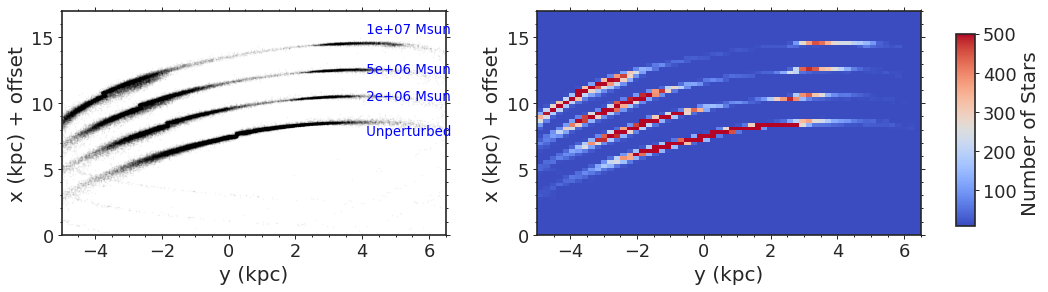

In [117]:
master_x=[]
master_y=[]
#compare and contrast
fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2)

#unpeturbed stream
filename='orgininalmass_1_times_pal5_rgc10*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st_unper=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
ax.scatter(st_unper.y, st_unper.x, s=.05, alpha=0.1, c='k')
#ax[1].scatter(st_unper.y, st_unper.z, s=.1)
#ax[-1].scatter(st_unper.x, st_unper.z, s=.1)
ax.text(4, np.nanmedian(st_unper.x.value)  , \
            " Unperturbed" ,c='b', fontsize=12)
master_x.append(st_unper.y.value)
master_y.append(st_unper.x.value)

#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo2.00e+06*_vhalo-20*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+2, s=.05, alpha=0.1, c='k')
ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+2) ,
            " {:.0e} Msun".format(2e6) ,c='b', fontsize=12)

master_x.append(st0.y.value)
master_y.append(st0.x.value+2)

#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo5.00e+06*_vhalo-20*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+4, s=.05, alpha=0.1, c='k')
master_x.append(st0.y.value)
master_y.append(st0.x.value+4)
ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+4) , \
            " {:.0e} Msun".format(5e6) ,c='b', fontsize=12)


#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo1.00e+07*_vhalo-20*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+6, s=.05, alpha=0.1, c='k')
master_x.append(st0.y.value)
master_y.append(st0.x.value+6)

ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+6)+1 , \
            " {:.0e} Msun".format(1e7) ,c='b', fontsize=12)




xlim=[-5, 6.5]
ylim=[0, 17]



for a in [ax, ax1]:
    a.set(ylim=ylim, xlim=xlim)
    a.set_xlabel('y (kpc)', fontsize=18)
    a.set_ylabel('x (kpc) + offset', fontsize=18)
    a.minorticks_on()
    

make_density_plot(np.array([np.concatenate(master_x).flatten(), np.concatenate(master_y).flatten()]),
                 ax1, xlim=xlim, ylim=ylim,    bins=60,cmap='coolwarm', hist=True)
plt.tight_layout()
plt.savefig(path_plot+'/streams_side_bysize.jpeg', bbox_inches='tight')

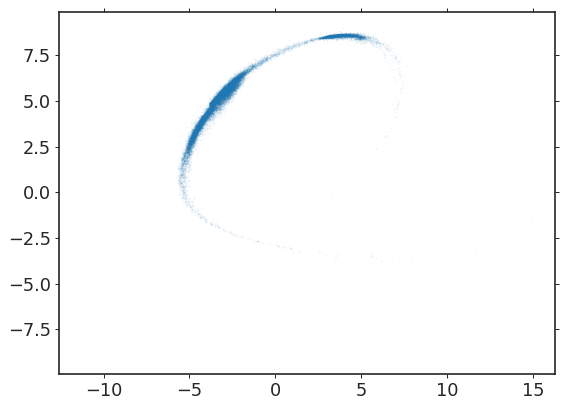

In [99]:
fig, ax=plt.subplots()
ax.scatter(st0.y, st0.x, s=.1, alpha=0.1)

/var/folders/p5/jqfspzln0z965dsfd1pj_5900000gp/T/ipykernel_12037/1809636824.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



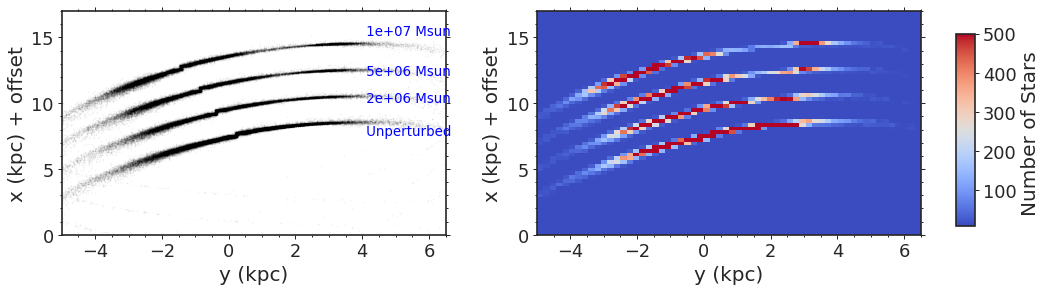

In [118]:
master_x=[]
master_y=[]
#compare and contrast
fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2)

#unpeturbed stream
filename='orgininalmass_1_times_pal5_rgc10*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st_unper=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
ax.scatter(st_unper.y, st_unper.x, s=.05, alpha=0.1, c='k')
#ax[1].scatter(st_unper.y, st_unper.z, s=.1)
#ax[-1].scatter(st_unper.x, st_unper.z, s=.1)
ax.text(4, np.nanmedian(st_unper.x.value)  , \
            " Unperturbed" ,c='b', fontsize=12)
master_x.append(st_unper.y.value)
master_y.append(st_unper.x.value)

#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo2.00e+06*_vhalo-50*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+2, s=.05, alpha=0.1, c='k')
ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+2) ,
            " {:.0e} Msun".format(2e6) ,c='b', fontsize=12)

master_x.append(st0.y.value)
master_y.append(st0.x.value+2)

#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo5.00e+06*_vhalo-50*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+4, s=.05, alpha=0.1, c='k')
master_x.append(st0.y.value)
master_y.append(st0.x.value+4)
ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+4) , \
            " {:.0e} Msun".format(5e6) ,c='b', fontsize=12)


#perturbed stream
filename='mass_1_times_pal5_rgc10_mhalo1.00e+07*_vhalo-50*'
f=path_data+'/{}.npy'.format(filename)
filenames=np.array(glob.glob(f))
st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']

ax.scatter(st0.y.value, st0.x.value+6, s=.05, alpha=0.1, c='k')
master_x.append(st0.y.value)
master_y.append(st0.x.value+6)

ax.text(4, np.nanmean(st0.x.value[st0.y.value>0]+6)+1 , \
            " {:.0e} Msun".format(1e7) ,c='b', fontsize=12)




xlim=[-5, 6.5]
ylim=[0, 17]



for a in [ax, ax1]:
    a.set(ylim=ylim, xlim=xlim)
    a.set_xlabel('y (kpc)', fontsize=18)
    a.set_ylabel('x (kpc) + offset', fontsize=18)
    a.minorticks_on()
    

make_density_plot(np.array([np.concatenate(master_x).flatten(), np.concatenate(master_y).flatten()]),
                 ax1, xlim=xlim, ylim=ylim,    bins=60,cmap='coolwarm', hist=True)
plt.tight_layout()

plt.savefig(path_plot+'/streams_side_bysize_50.jpeg', bbox_inches='tight')

In [5]:
hj

NameError: name 'hj' is not defined

In [ ]:
#pick two images in M31 
fig, ax=plt.subplots(nrows=2, figsize=(12, 10), ncols=2)
m31_keys=['{} mlimit {}'.format('50_60', m) for m in [27.15, 28.54]]
mhalo=2e6
for idx in range(len(m31_keys)):
    k= list(m31_keys)[idx]
    filename=path_data+'/gaps_at_M31{}Mhalo={:.2e}'.format(k, mhalo)
    data=pd.read_csv(filename)
    ax[0][idx].scatter(data.x, data.y, s=1, alpha=.5, color='#111111')
    
    ax[0][idx].set(xlabel='X (kpc)', ylabel='Y (kpc)')

ax[0][0].set_title(r'Msub=2x10$^6$ Msun, 1000s', fontsize=25)
ax[0][1].set_title(r'Msub=2x10$^6$ Msun, 1hr', fontsize=25)
plt.tight_layout()




m31_keys=['{} mlimit {}'.format('50_60', m) for m in [27.15, 28.54]]
mhalo=5e6
for idx in range(len(m31_keys)):
    k= list(m31_keys)[idx]
    filename=path_data+'/gaps_at_M31{}Mhalo={:.2e}'.format(k, mhalo)
    data=pd.read_csv(filename)
    ax[1][idx].scatter(data.x, data.y, s=1, alpha=.5, color='#111111')
    
    ax[1][idx].set(xlabel='X (kpc)', ylabel='Y (kpc)')


ax[1][0].set_title(r'Msub=5x10$^6$ Msun, 1000s', fontsize=25)
ax[1][1].set_title(r'Msub=5x10$^6$ Msun, 1hr', fontsize=25)
plt.tight_layout()
plt.savefig(path_plot+'/gaps_m31.jpeg',  bbox_inches='tight')

In [ ]:
d=([ 1.3, 1.5, 1.6, 1.7, 2.0])*u.Mpc
5*np.log10(d.to(u.pc)/(10*u.pc)).value

In [ ]:
#pick two images at large distances
fig, ax=plt.subplots(nrows=2, figsize=(12, 10), ncols=2)
keys=['23.49', '25.00',  '26.15', '26.51']
mag_limit=28.54
mhalo=5e6
for idx, a in zip(range(len(keys)),  np.concatenate(ax)) :
    dmod= keys[idx]
    k= keys[idx]
    print (k)
    filename=path_data+'/gaps_at_OTHER{}Mhalo={:.2e}_maglimit{}.txt'.format(k, mhalo, mag_limit)
    data=pd.read_csv(filename)
    d_M31=10**(float(dmod)/5+1)*u.pc.to(u.Mpc)
    a.scatter(data.x, data.y, s=1, alpha=.5, color='#111111')
    a.set(xlabel='X (kpc)', ylabel='Y (kpc)')
    a.set_title(r'Msub=5x10$^6$ Msun, 1hr @ {:.2f} Mpc'.format( d_M31), fontsize=25)
    
plt.tight_layout()
plt.savefig(path_plot+'/gaps_distance.jpeg', bbox_inches='tight')
    

In [ ]:
path_plot

In [ ]:
from findthegap.gapper import Gapper
import torch

In [ ]:
#REAd one of the cuouts

In [ ]:
#gaps_at_M3150_60 mlimit 28.54Mhalo=5.00e+06_cutout

In [ ]:
#GABBY'S GAPPY DATA
filename=path_data+'/gaps_at_M31{} mlimit {}Mhalo={:.2e}_cutout'.format('50_60', 28.54, 5e6) 
data= pd.read_csv(filename).values

In [ ]:
data[:,0].min(), data[:,0].max(), data[:,1].min(), data[:,1].max()

In [ ]:
#compute grid
xlims = (66, 75)
ylims =  (30,33)
min_bw = .1


# Boundaries for the Gapper (if none are provided, this is the default mode)
bounds = np.array([[np.min(data[:,d]),np.max(data[:,d])] for d in range(data.shape[1])])

gridding_size = [ int((xlims[1]-xlims[0])/min_bw), int((ylims[1]-ylims[0])/min_bw)]

grid_linspace = [ np.linspace(bounds[d][0], bounds[d][1], gridding_size[d]) for d in range(2) ]


meshgrid = np.meshgrid(*grid_linspace, indexing='ij')

meshgrid_ravel = [ xi.ravel().reshape(-1,1) for xi in meshgrid]
grid_data = np.hstack(meshgrid_ravel)

bws=[0.1, 0.2,0.5, 1.1]

res=dict(zip(bws, [None for x in bws]))

for bw in bws:

    #run for multiple bandwidths
    gapper_base = Gapper(data, bw, bounds)

    #compute density along the grid 
    grid_density = gapper_base.kde.score_samples(torch.tensor(grid_data))

    #density matrix 
    density_matr = grid_density.reshape((gridding_size[0], gridding_size[1]))

    #compute piHpi matrix by bootstraping
    maxeigval_PiHPi_boots = []

    for i in range(5):

        boot_indx = np.random.choice(np.arange(data.shape[0]), data.shape[0], 
                                     replace=True) ## Sample with replacement:bootstrap

        gapper_ = Gapper(data[boot_indx], bw, bounds)
        PiHPis_grid = []
        eigval_PiHPi = [] 

        for pt in grid_data:
            _pihpi = gapper_.get_PiHPi(pt) 
            _pihpi_eigval, _pihpi_eigvec = np.linalg.eigh(_pihpi)

            PiHPis_grid.append(_pihpi)
            eigval_PiHPi.append(_pihpi_eigval)

        PiHPis_grid, eigval_PiHPi = np.array(PiHPis_grid), np.array(eigval_PiHPi)
        max_eigval_PiHPi_k = np.max(eigval_PiHPi, axis=1)
        maxeigval_PiHPi_boots.append(max_eigval_PiHPi_k)
        print(f'Run {i} finished')

    #visualize and take the median
    maxeigval_PiHPi_boots = np.array(maxeigval_PiHPi_boots)
    print(maxeigval_PiHPi_boots.shape)

    #median
    med_maxeigval_pihpi = np.median(maxeigval_PiHPi_boots, axis=0)


    med_maxeigval_pihpi_resh = med_maxeigval_pihpi.reshape((gridding_size[0], gridding_size[1]))
    
    
    res[bw]= [ density_matr, med_maxeigval_pihpi_resh]

In [ ]:
bw=0.5

In [ ]:
bws

In [ ]:
fig, ax=plt.subplots(figsize=(12, 6), nrows=2)

#for idx in range(len(bws)):
idx=0
density_matr, med_maxeigval_pihpi_resh= res[bw]

#pi = ax[-1].contourf(meshgrid[0], meshgrid[1], med_maxeigval_pihpi_resh,\
#                    20, cmap='afmhot', extend='min')

#ax[-1].contour(meshgrid[0], meshgrid[1], density_matr, 20, \
#              cmap='spring', alpha=.5)

#(x0, y0, width, height)
#x0, y0, w, h=ax[idx].get_position(original=False).bounds

#cax = fig.add_axes([.9, y0, .015, h])
#cb = plt.colorbar(pi, label="$\Pi \mathbf{H} \Pi$ ", ax=ax[idx])
#ax = cb.ax
#text = ax.yaxis.label

ax[-1].set_title('BW = {} Kpc'.format(bw), fontsize=25)




ax[0].scatter(data[:,0], data[:, 1], s=1,color='#111111', zorder=1)


#plt.legend(fontsize=15)
 #nested for loops three times! aha 
for xi in  grid_linspace[0].flatten():
    ax[-1].axvline(xi, alpha=0.1, c='k')

for yi in grid_linspace[1].flatten():
    ax[-1].axhline(yi, alpha=0.1, c='k')

for a in ax:
    a.set(xlabel='X (kpc) + Offset ', ylabel='Y (kpc) + Offset', xlim=bounds[0], ylim=bounds[1])
    
plt.tight_layout()
plt.savefig(path_plot+'/gaps_detection_bw.jpeg', bbox_inches='tight')

In [ ]:
grid_linspace 